# Lifestyle Factors Associated with High Personal Achievement
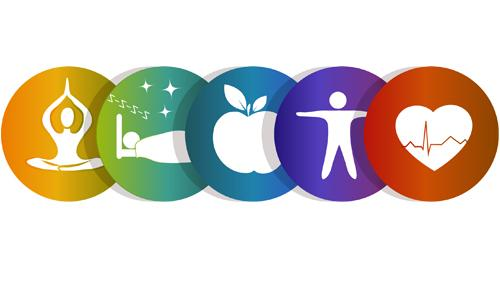

# ```Project Summary```
 
**Using a dataset of 12,757 survey responses to questions about 23 lifestyle attributes, I sought to determine lifestyle factors that were most likely to lead to high personal achievement.**

Survey respondents self-reported how many personal achievements they have completed. (Examples of achievements given as part of the survey question were: running a marathon or important race, birth, successful kids, new house or major renovation, major success at work, opening a new business).

I then classified respondents as: <br>
- Low achievers (0-1 achievements) <br>
- Average achievers (2-7 achievements)<br>
- High achievers (8 or more achievements)<br>

Dataset: https://www.kaggle.com/ydalat/lifestyle-and-wellbeing-data

The actual survey was given by given Authenic-Happiness.come and is linked here: http://www.authentic-happiness.com/your-life-satisfaction-score

Data Science Team: Barbara Marques, Data Science Student @ CodeUp, San Antonio, Tx.

**Project Goals:**
- Identify drivers of high personal achievement based on lifestyle factors. 
- Create a single notebook with necessary helper functions and instructions that will allow results to be replicated. 

**Significant Findings: ** <br>
Factors which contribute most to high levels of personal achievement include:**
- **passion** (devoting time daily pursuing what you are passionate/dreaming about)
- **vision** (having a clear life vision/goal for 5-10 years)
- **stress** (stress level was reported on a scale of 0-little to no stess to 5-very stressful)
- **meditation** (meditation, prayer or engaging relaxation activities such as walking in a park)

Trello board:  https://trello.com/b/ebZrkO2D/lifestyle-factors-that-affect-personal-achievement

_______________________________________________________________________________________________________________________

# ```Acquire Data```


<div class="alert alert-block alert-warning">
Takeaways:<br>
- Data was acquired in .csv form and written to a data frame via using acquire.py.<br>
- Pulled data limited to 15,971 observations including 24 attributes<br>

In [1]:
import pandas as pd
import acquire, prepare, explore, model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Statistical Tests
import scipy.stats as stats
from scipy.stats import pearsonr

# #Modeling Imports
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.cluster import KMeans, dbscan
from sklearn.feature_selection import SelectKBest, RFE, f_regression 
from sklearn.linear_model import LogisticRegression, LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = acquire.get_wellbeing_data()
df.head(2)

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6


In [3]:
df.shape

(15972, 24)

In [4]:
#How many nulls in each column?
df.isnull().sum(axis =0).sum()

0

In [5]:
#How many nulls in each row?
df.isnull().sum(axis =1).sum()

0

In [6]:
df.columns

Index(['Timestamp', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED',
       'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT',
       'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
       'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING',
       'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
       'WEEKLY_MEDITATION', 'AGE', 'GENDER', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15972 non-null  object 
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-null  int64  
 13  LIVE_VISION              15972 non-null  int64  
 14  SLEEP_HOURS           

In [8]:
df.ACHIEVEMENT.value_counts()

2     2606
3     2538
5     2031
4     1838
1     1595
0     1302
10    1170
6     1145
7      814
8      693
9      240
Name: ACHIEVEMENT, dtype: int64

_______________________________________________________________________________________________________________________

# ```Prepare Data```


<div class="alert alert-block alert-warning">
Takeaways:<br>
    
- Using prepare.prep_wellbeing data was prepared for use in exploration. <br>
After initial exploration, the prepare was refined to accomplish the following: <br>
- Data was checked for nulls, necessary columns were dropped, columns were renamed to user-friendly names,<br>
- Univariate exploration on data revealed that some binning was necessary to best model the data
- The following data was binned and dummy columns were created and appended to the data frame: <br>
    achievement, sleep hours, age, gender <br><\div>

In [9]:
df = prepare.prep_wellbeing(df)

In [10]:
df.columns

Index(['fruit_veg', 'stress', 'core_circle', 'support', 'social',
       'achievement', 'donation', 'bmi', 'steps', 'vision', 'sleep_hrs',
       'shouts', 'awards', 'passion', 'meditation', 'age_range', 'gender',
       'balance', 'ach_level', 'sleep_bins', 'low_ach', 'avg_ach', 'high_ach',
       'female', 'male', '21 to 35', '36 to 50', '51 or more', 'Less than 20',
       '0-4 hrs', '5-8 hrs', '9+ hrs'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15971 entries, 0 to 15971
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   fruit_veg     15971 non-null  int64   
 1   stress        15971 non-null  int64   
 2   core_circle   15971 non-null  int64   
 3   support       15971 non-null  int64   
 4   social        15971 non-null  int64   
 5   achievement   15971 non-null  int64   
 6   donation      15971 non-null  int64   
 7   bmi           15971 non-null  int64   
 8   steps         15971 non-null  int64   
 9   vision        15971 non-null  int64   
 10  sleep_hrs     15971 non-null  int64   
 11  shouts        15971 non-null  int64   
 12  awards        15971 non-null  int64   
 13  passion       15971 non-null  int64   
 14  meditation    15971 non-null  int64   
 15  age_range     15971 non-null  object  
 16  gender        15971 non-null  object  
 17  balance       15971 non-null  float64 
 18  ach_le

In [12]:
df.stress.value_counts()

3    4398
2    3407
4    2960
1    2478
5    2052
0     676
Name: stress, dtype: int64

In [13]:
df.support.value_counts()


10    3993
5     1915
3     1835
4     1646
2     1576
6     1119
7     1053
8      917
1      883
0      740
9      294
Name: support, dtype: int64

In [14]:
df.sleep_hrs.value_counts()

7     5566
8     4324
6     3396
5     1025
9      987
10     333
4      252
3       49
2       21
1       18
Name: sleep_hrs, dtype: int64

In [15]:
df.sleep_bins.value_counts()

5-8 hrs    14273
0-4 hrs     1365
9+ hrs       333
Name: sleep_bins, dtype: int64

In [16]:
# Achievement levels prior to binning
df.achievement.value_counts()

2     2606
3     2538
5     2030
4     1838
1     1595
0     1302
10    1170
6     1145
7      814
8      693
9      240
Name: achievement, dtype: int64

In [17]:
df.ach_level.value_counts()

avg_ach     10971
low_ach      2897
high_ach     2103
Name: ach_level, dtype: int64

In [18]:
# cat_vars = [ 'achievement','bmi', 'age_range',  'gender', 'sleep_bins']
# quant_vars = ['stress', 'core_circle', 'support', 'donation', 
#                     'steps', 'sleep_hrs', 'shouts', 'awards', 'passion', 'meditation' ]


# explore.explore_univariate(train, cat_vars, quant_vars)



_______________________________________________________________________________________________________________________

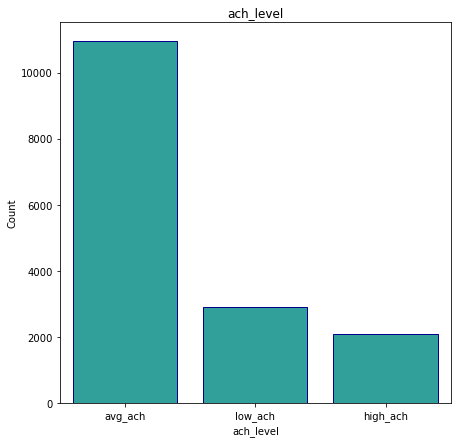

         ach_level  Count  Percent
avg_ach    avg_ach  10971    68.69
low_ach    low_ach   2897    18.14
high_ach  high_ach   2103    13.17
_________________________________________________________________


In [19]:
cat_vars = ['ach_level']
quant_vars = []

explore.explore_univariate(df, cat_vars, quant_vars)


<font color = 'red'> **Takeaways on Achievement Level:**

***Achievement Levels Explained:*** 
Respondents self-reported how many personal achievements they have completed. Example of achievements given as part of the survey question were: running a marathon or important race, birth, successful kids, new house or major renovation, major success at work, opening a new business).

I binned these responses as follows: 
-  Low achiever = 0-1 achievements
-  Avg achiever = 2-7 achievements
- High achiever = or more achievements

The vast majority (69%) of respondents were classified as average achievers, 18% were low achievers, ***13% were identified as high achievers***. 

<a id='SD'></a>
# ```Split Data``` 
- Data is split into train and two out-of-sample sets (validate and test), then written to pandas dataframes in preparation for bivariate exploration of the sample (train) data set. 

In [20]:
#splitting data for exploration
train, validate, test = prepare.train_validate_test_split(df, 'high_ach', seed=123)

train.shape, validate.shape, test.shape

((8943, 32), (3833, 32), (3195, 32))

In [21]:
train.columns

Index(['fruit_veg', 'stress', 'core_circle', 'support', 'social',
       'achievement', 'donation', 'bmi', 'steps', 'vision', 'sleep_hrs',
       'shouts', 'awards', 'passion', 'meditation', 'age_range', 'gender',
       'balance', 'ach_level', 'sleep_bins', 'low_ach', 'avg_ach', 'high_ach',
       'female', 'male', '21 to 35', '36 to 50', '51 or more', 'Less than 20',
       '0-4 hrs', '5-8 hrs', '9+ hrs'],
      dtype='object')

In [22]:
train.stress.value_counts()

3    2459
2    1904
4    1637
1    1410
5    1144
0     389
Name: stress, dtype: int64

In [23]:
train = pd.DataFrame(train)
validate = pd.DataFrame(validate)
test = pd.DataFrame(test)

_______________________________________________________________________________________________________________________

# ```Explore Data```


## Initial Thoughts
- expect high correlation between achievement and sleep, stress, negative emotions, meditation
- does bmi have an impact on achievement?
- does high achievement = high stress / can less stress still = high achievement?
- how does female achievement compare to male?
- expect higher age to contribute to higher achievement (based on more life experience)

In [24]:
# #sns.pairplot(train, hue = 'stress', edgecolor = 'darkblue', palette = 'Accent')

# b=['bmi','age_range', 'gender', 'stress', 'core_circle', 'donation', 'steps', 'sleep_hrs', 'passion','meditation']
# sns.pairplot(b, corner=True, palette = 'Accent')
# plt.show()

In [25]:
train.stress.describe()

count    8943.000000
mean        2.780163
std         1.371736
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: stress, dtype: float64

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8943 entries, 10725 to 10092
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   fruit_veg     8943 non-null   int64   
 1   stress        8943 non-null   int64   
 2   core_circle   8943 non-null   int64   
 3   support       8943 non-null   int64   
 4   social        8943 non-null   int64   
 5   achievement   8943 non-null   int64   
 6   donation      8943 non-null   int64   
 7   bmi           8943 non-null   int64   
 8   steps         8943 non-null   int64   
 9   vision        8943 non-null   int64   
 10  sleep_hrs     8943 non-null   int64   
 11  shouts        8943 non-null   int64   
 12  awards        8943 non-null   int64   
 13  passion       8943 non-null   int64   
 14  meditation    8943 non-null   int64   
 15  age_range     8943 non-null   object  
 16  gender        8943 non-null   object  
 17  balance       8943 non-null   float64 
 18  ach

In [27]:
train["low_ach"] = train['low_ach'].astype('int64')
train["avg_ach"] = train['avg_ach'].astype('int64')
train["high_ach"] = train['high_ach'].astype('int64')
train["female"] = train['female'].astype('int64')
train["male"] = train['male'].astype('int64')

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8943 entries, 10725 to 10092
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   fruit_veg     8943 non-null   int64   
 1   stress        8943 non-null   int64   
 2   core_circle   8943 non-null   int64   
 3   support       8943 non-null   int64   
 4   social        8943 non-null   int64   
 5   achievement   8943 non-null   int64   
 6   donation      8943 non-null   int64   
 7   bmi           8943 non-null   int64   
 8   steps         8943 non-null   int64   
 9   vision        8943 non-null   int64   
 10  sleep_hrs     8943 non-null   int64   
 11  shouts        8943 non-null   int64   
 12  awards        8943 non-null   int64   
 13  passion       8943 non-null   int64   
 14  meditation    8943 non-null   int64   
 15  age_range     8943 non-null   object  
 16  gender        8943 non-null   object  
 17  balance       8943 non-null   float64 
 18  ach

<AxesSubplot:xlabel='age_range', ylabel='Count'>

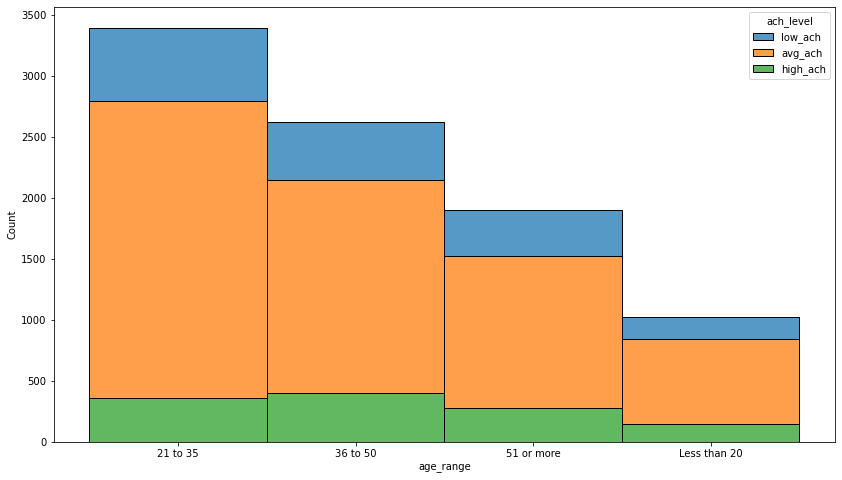

In [28]:
plt.figure(figsize=(14, 8))
hue_order = ['low_ach', 'avg_ach', 'high_ach']
sns.histplot(data=train, x="age_range", hue = "ach_level", multiple="stack")


In [29]:
train.columns

Index(['fruit_veg', 'stress', 'core_circle', 'support', 'social',
       'achievement', 'donation', 'bmi', 'steps', 'vision', 'sleep_hrs',
       'shouts', 'awards', 'passion', 'meditation', 'age_range', 'gender',
       'balance', 'ach_level', 'sleep_bins', 'low_ach', 'avg_ach', 'high_ach',
       'female', 'male', '21 to 35', '36 to 50', '51 or more', 'Less than 20',
       '0-4 hrs', '5-8 hrs', '9+ hrs'],
      dtype='object')

<AxesSubplot:xlabel='stress', ylabel='balance'>

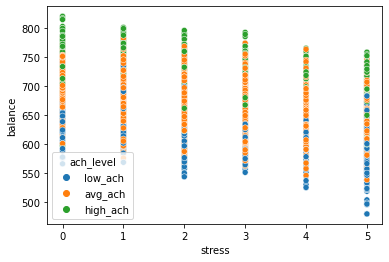

In [30]:
sns.scatterplot(x='stress', y='balance',
               data=train, hue='ach_level')

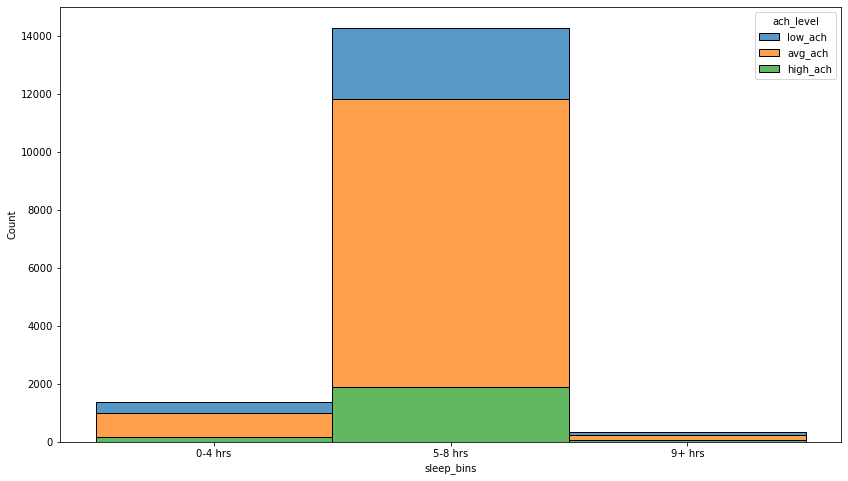

In [31]:
plt.figure(figsize=(14, 8))
hue_order = ['low_ach', 'avg_ach', 'high_ach']
sns.histplot(data=df, x="sleep_bins", hue = "ach_level", multiple="stack")

plt.show()

In [32]:
# plt.figure(figsize=(14, 8))
# sns.histplot(data=df, x="high_ach", hue = "sleep_bins", multiple="stack")

# plt.show()

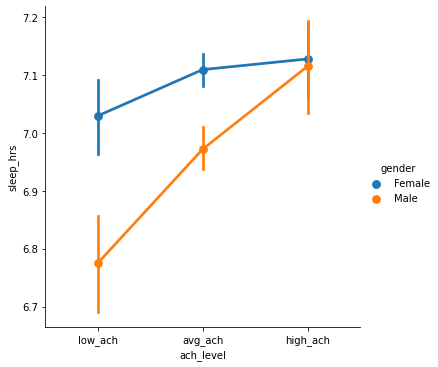

In [33]:
sns.factorplot(x = "ach_level", y = 'sleep_hrs', hue = "gender",data = df);
plt.show()

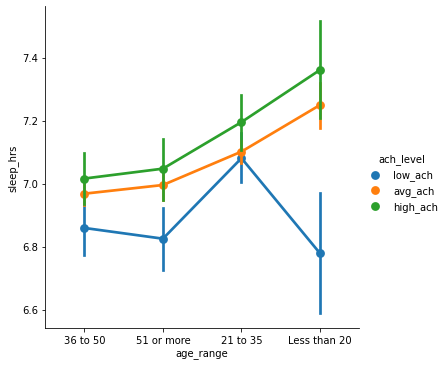

In [34]:
sns.factorplot(x = "age_range", y = 'sleep_hrs', hue = "ach_level",data = df);
plt.show()

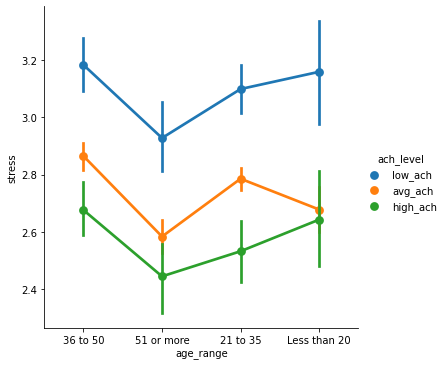

In [35]:
sns.factorplot(x = "age_range", y = 'stress', hue = "ach_level",data = df);
plt.show()

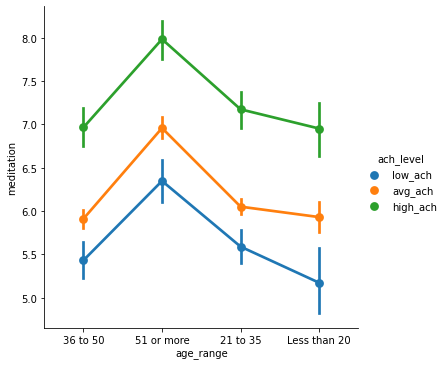

In [36]:
sns.factorplot(x = "age_range", y = 'meditation', hue = "ach_level",data = df);
plt.show()

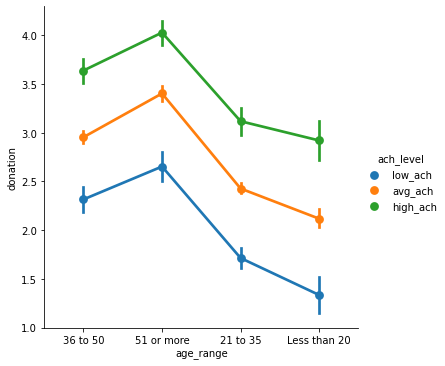

In [37]:
sns.factorplot(x = "age_range", y = 'donation', hue = "ach_level",data = df);
plt.show()

In [38]:
train.columns

Index(['fruit_veg', 'stress', 'core_circle', 'support', 'social',
       'achievement', 'donation', 'bmi', 'steps', 'vision', 'sleep_hrs',
       'shouts', 'awards', 'passion', 'meditation', 'age_range', 'gender',
       'balance', 'ach_level', 'sleep_bins', 'low_ach', 'avg_ach', 'high_ach',
       'female', 'male', '21 to 35', '36 to 50', '51 or more', 'Less than 20',
       '0-4 hrs', '5-8 hrs', '9+ hrs'],
      dtype='object')

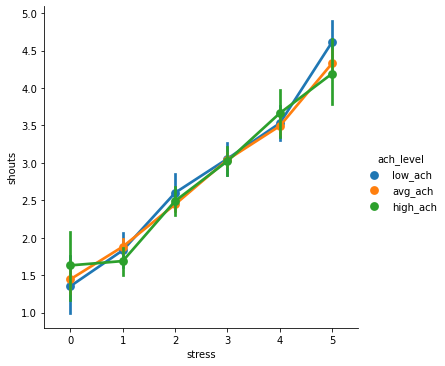

In [39]:
sns.factorplot(x = "stress", y = 'shouts', hue = "ach_level",data = df);
plt.show()

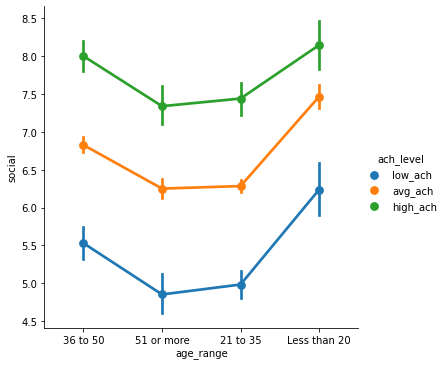

In [40]:
sns.factorplot(x = "age_range", y = 'social', hue = "ach_level",data = df);
plt.show()

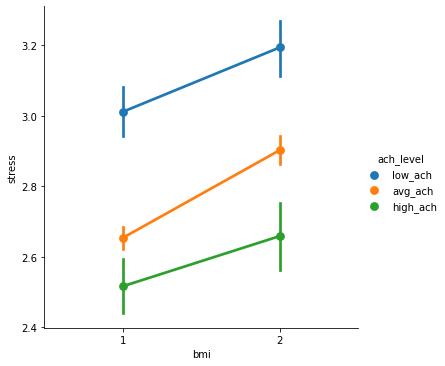

In [41]:
sns.factorplot(x = "bmi", y = 'stress', hue = "ach_level",data = df);
plt.show()

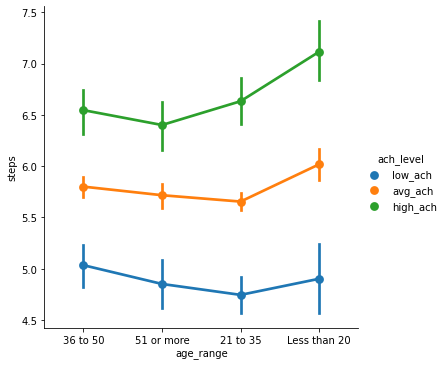

In [42]:
sns.factorplot(x = "age_range", y = 'steps', hue = "ach_level",data = df);
plt.show()

In [43]:
# sns.catplot(x="sleep_bins", y="stress", hue="ach_level", kind="swarm", data=train)

In [44]:
# sns.catplot(x="age_range", y="stress", hue="ach_level", kind="swarm", data=train)

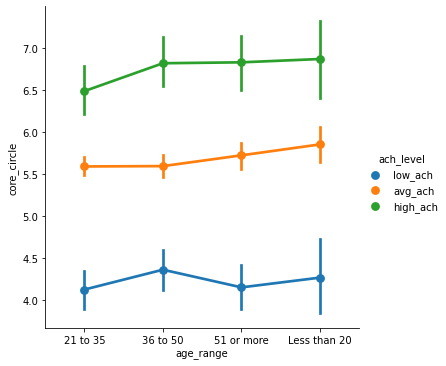

In [45]:
sns.factorplot(x = "age_range", y = 'core_circle', hue = "ach_level",data = train);
plt.show()

In [46]:

# target = [['high_ach']]
# continuous_target = [['high_ach']]
# cat_vars = [['female']]
# # train[['bmi', 'female', 'male']]
# quant_vars = [['stress', 'core_circle', 'support', 'social', 'donation',
#        'steps', 'sleep_hrs', 'shouts', 'awards', 'passion', 'meditation']]

# OLDexplore.explore_bivariate(train, target, cat_vars, quant_vars)


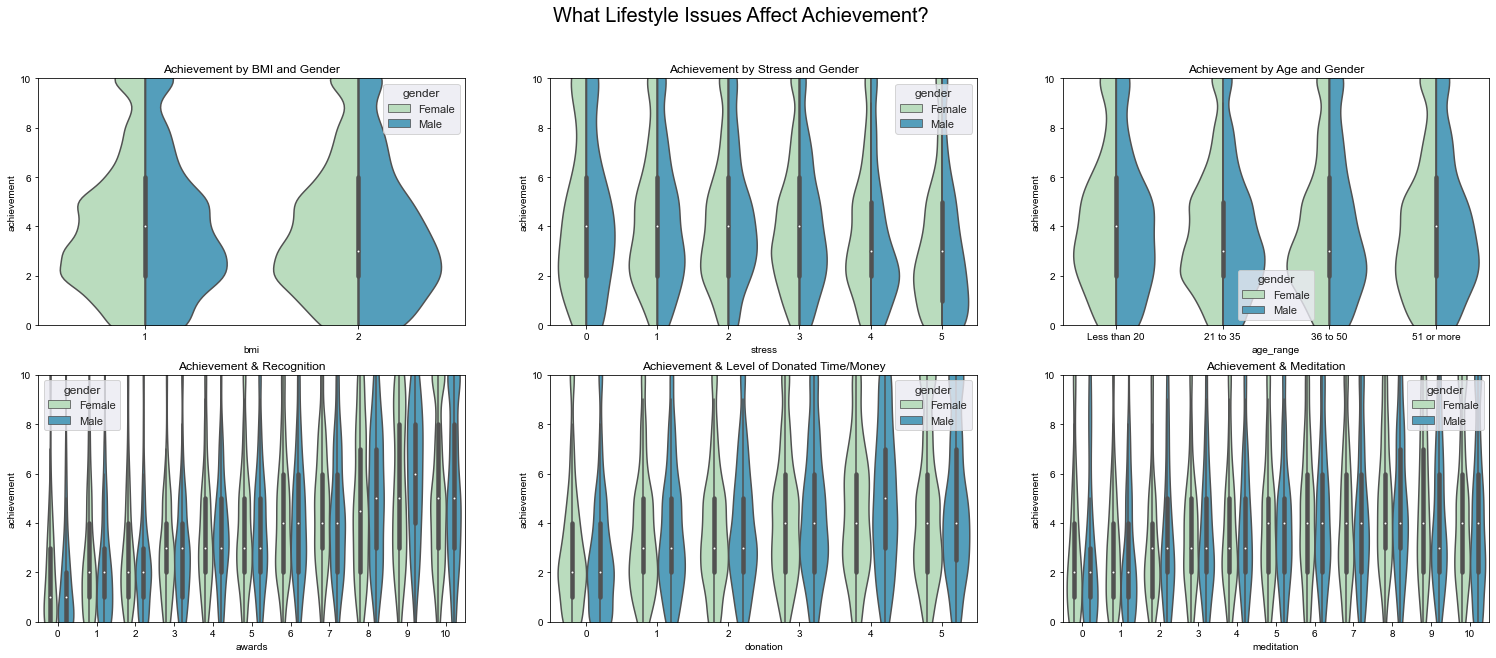

In [47]:



f,ax = plt.subplots(2,3,figsize=(26,10))
f.suptitle('What Lifestyle Issues Affect Achievement?', fontsize=20)
ax[0,0].set_title('Achievement by BMI and Gender')
ax[0,1].set_title('Achievement by Stress and Gender')
ax[0,2].set_title('Achievement by Age and Gender')
ax[1,0].set_title('Achievement & Recognition')
ax[1,1].set_title('Achievement & Level of Donated Time/Money')
ax[1,2].set_title('Achievement & Meditation')

ax[0,0].set_ylim([0, 10])
sns.set(style="darkgrid")
sns.violinplot(x= 'bmi',y='achievement', palette='GnBu', hue = 'gender', data=train, ax = ax[0,0], 
                split = True)

ax[0,1].set_ylim([0, 10])
sns.set(style="darkgrid")
sns.violinplot(x= 'stress',y='achievement', palette='GnBu', hue = 'gender', data=train, ax = ax[0,1], 
                 split = True)
ax[0,2].set_ylim([0, 10])
sns.violinplot(x = 'age_range', y = 'achievement', hue = 'gender', palette='GnBu', data = train,
               order=['Less than 20', '21 to 35', '36 to 50', '51 or more'], split = True, ax = ax[0,2])
ax[1,0].set_ylim([0, 10])
sns.violinplot(x = 'awards', y = 'achievement', hue = 'gender', palette='GnBu', data=train, ax = ax[1,0])
ax[1,1].set_ylim([0, 10])
sns.violinplot(x = 'donation', y = 'achievement',hue = 'gender',palette='GnBu', data=train, ax = ax[1,1])
ax[1,2].set_ylim([0, 10])
sns.violinplot(x = 'meditation', y = 'achievement', hue = 'gender', palette='GnBu', data=train, ax = ax[1,2])


plt.show()


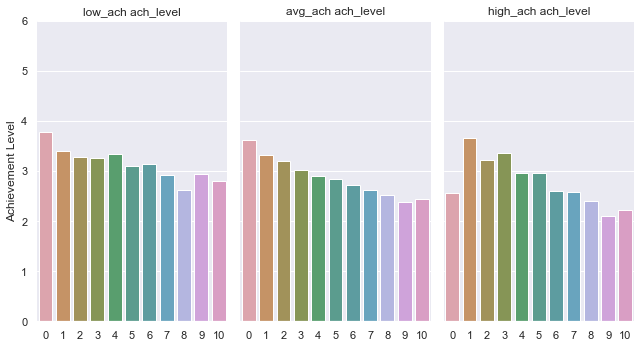

In [48]:
b = sns.catplot(x="meditation", y="stress", col="ach_level",
data=train, saturation=.5,kind="bar", ci=None, aspect=.6)
(b.set_axis_labels("", "Achievement Level")
.set_titles("{col_name} {col_var}")
.set(ylim=(0, 6))
.despine(left=True))  


In [49]:
# # ACHIEVEMENT LEVELS
# f,ax = plt.subplots(2,3,figsize=(16,12))
# ax[0,0].set_title('ACHIEVEMENT BY AGE GROUP')
# ax[0,1].set_title('ACHIEVEMENT BY GENDER')
# ax[0,2].set_title('ACHIEVEMENT BY AGE & GENDER')
# ax[1,0].set_title('ACHIEVEMENT & STRESS')
# ax[1,1].set_title('ACHIEVEMENT & WORK/LIFE BALANCE')
# ax[1,2].set_title('ACHIEVEMENT & SUFFICIENT INCOME:2=sufficient,1=not')

# ax[0,0].set_ylim([0, 10])
# df3.plot(x= 'age_range',y='achievement', kind='bar', color=('darksalmon', 'green'), alpha=0.7, ax = ax[0,0])


# sns.violinplot(x= 'gender',y='achievement', palette='coolwarm_r', data=df, ax = ax[0,1])
# sns.violinplot(x = 'age_range', y = 'achievement', hue = 'gender', palette='coolwarm_r', data = df,
#                order=['20 or less', '21 to 35', '36 to 50', '51 or more'], split = True, ax = ax[0,2])
# sns.pointplot(x = 'stress', y = 'achievement',  data=df, ax = ax[1,0])
# sns.pointplot(x = 'balance', y = 'achievement', data=df, ax = ax[1,1])
# sns.pointplot(x = 'passion', y = 'achievement',  data=df, ax = ax[1,2])

# f.suptitle('WHAT DRIVES OUR PERSONAL ACHIEVEMENT LEVELS?', fontsize=20)
# plt.show()


In [50]:
#sns.heatmap(train,cmap="YlGnBu", annot = True)

_______________________________________________________________________________________________________________________

## Chi<sup>2</sup> Test: Sleep / Achievement

H<sub>0</sub>: There is no relationship between sleep and levels of personal achievement. <br>
H<sub>a</sub>: There is a dependent relationship between sleep and levels of personal achievement. <br>

<div class="alert alert-block alert-warning">
Takeaways<br>
- Chi<sup>2</sup> value = 57.72183713685227<br>
- Confidence Level = 0.95 and alpha = 0.05<br>
- p-value is 8.729019953582671e-12.<br>
- degrees of freedom = 4

I reject the null hypothesis and move forward with the alternative hypothesis.<br>
**There appears to be a dependent relationship between sleep hours and achievement levels.**</div>

In [51]:
# ctab == observed values

ctab = pd.crosstab(train.sleep_bins, train.ach_level)

#set alpha
confidence_level = .95
α = round(1 - confidence_level,2)
α

0.05

In [52]:
#expected == values we would expect to see if the variables are independent of each other.

chi2, p, degf, expected = stats.chi2_contingency(ctab)

print(f'chi2 value = {chi2}') 
print()
print(f'Confidence Level = {confidence_level} and alpha = {α}')
print()
print(f'p-value is {p}.')
print()
print(f'degrees of freedom = {degf}')
print()
if p<α:
    print('I reject the null hypothesis and move forward with the alternative hypothesis.')
    print('There appears to be a dependent relationship between sleep hours and achievement levels.')
else:
    print('I fail to reject the null hypothesis. We cannot assume there is relationship between sleep and achievement levels.')

chi2 value = 57.72183713685227

Confidence Level = 0.95 and alpha = 0.05

p-value is 8.729019953582671e-12.

degrees of freedom = 4

I reject the null hypothesis and move forward with the alternative hypothesis.
There appears to be a dependent relationship between sleep hours and achievement levels.


_______________________________________________________________________________________________________________________

## Chi<sup>2</sup> Test: BMI / Achievement

H<sub>0</sub>: There is no relationship between bmi and levels of personal achievement. <br>
H<sub>a</sub>: There is a dependent relationship between bmi and levels of personal achievement. <br>

<div class="alert alert-block alert-warning">
Takeaways
- chi2 value = 7.582172675515568<br>
- Confidence Level = 0.95 and alpha = 0.05<br>
- p-value is 0.022571068723715143.<br>
- degrees of freedom = 2<br>

I reject the null hypothesis and move forward with the alternative hypothesis.<br>
**There appears to be a dependent relationship between BMI and achievement levels.**

In [53]:
# ctab == observed values

ctab = pd.crosstab(train.bmi, train.ach_level)

#set alpha
confidence_level = .95
α = round(1 - confidence_level,2)
α

0.05

In [54]:
#expected == values we would expect to see if the variables are independent of each other.

chi2, p, degf, expected = stats.chi2_contingency(ctab)

print(f'chi2 value = {chi2}') 
print()
print(f'Confidence Level = {confidence_level} and alpha = {α}')
print()
print(f'p-value is {p}.')
print()
print(f'degrees of freedom = {degf}')
print()
if p<α:
    print('I reject the null hypothesis and move forward with the alternative hypothesis.')
    print('There appears to be a dependent relationship between BMI and achievement levels.')
else:
    print('I fail to reject the null hypothesis. We cannot assume there is relationship between BMI and achievement levels.')

chi2 value = 7.582172675515568

Confidence Level = 0.95 and alpha = 0.05

p-value is 0.022571068723715143.

degrees of freedom = 2

I reject the null hypothesis and move forward with the alternative hypothesis.
There appears to be a dependent relationship between BMI and achievement levels.


_______________________________________________________________________________________________________________________

## Pearson's Correlation Test: Stress / Achievement

H<sub>0</sub>: There is no relationship between stress and levels of personal achievement. <br>
H<sub>a</sub>: There is a dependent relationship between stress and levels of personal achievement. <br>

<div class="alert alert-block alert-warning">
Takeaway<br>
stat=-0.118, p=0.000 <br>
I reject the null hypothesis and move forward with the alternative hypothesis.<br>
    
**There appears to be a dependent relationship between stress and achievement levels.**<\div>

In [55]:
# ctab == observed values

ctab = pd.crosstab(train.stress, train.ach_level)

#set alpha
confidence_level = .95
α = round(1 - confidence_level,2)
α

0.05

In [56]:
# Example of the Pearson's Correlation test
from scipy.stats import pearsonr
stat, p = pearsonr(train.stress, train.achievement)
print('stat=%.3f, p=%.3f' % (stat, p))

if p<α:
    print('I reject the null hypothesis.')
    print('There appears to be a dependent relationship between stress and achievement levels.')
else:
    print('I fail to reject the null hypothesis. We cannot assume there is no relationship between stress and achievement levels.')

stat=-0.118, p=0.000
I reject the null hypothesis.
There appears to be a dependent relationship between stress and achievement levels.


In [57]:
train.sleep_hrs.value_counts()

7     3133
8     2399
6     1924
5      557
9      551
10     194
4      138
3       28
2       10
1        9
Name: sleep_hrs, dtype: int64

In [58]:
# I will drop any remaining categorical features I have left.

X_train = train.drop(columns=['gender', 'age_range', 'sleep_bins', 'balance','ach_level', 'high_ach', 'low_ach', 'avg_ach', 'female', 'male', '21 to 35', '36 to 50', '51 or more',
       'Less than 20','achievement'])
y_train = train[['ach_level']]

X_validate = validate.drop(columns=['gender', 'age_range', 'sleep_bins', 'balance','ach_level', 'high_ach', 'low_ach', 'avg_ach','female', 'male', '21 to 35', '36 to 50', '51 or more',
       'Less than 20','achievement'])
y_validate = validate[['ach_level']]

X_test = test.drop(columns=['gender', 'age_range', 'sleep_bins', 'balance','ach_level', 'high_ach', 'low_ach', 'avg_ach','female', 'male', '21 to 35', '36 to 50', '51 or more',
       'Less than 20','achievement'])
y_test = test[['ach_level']]

In [59]:
X_train.head(2)

,fruit_veg,stress,core_circle,support,social,donation,bmi,steps,vision,sleep_hrs,shouts,awards,passion,meditation,0-4 hrs,5-8 hrs,9+ hrs
10725,2,1,6,4,4,1,1,4,2,7,1,3,3,1,0,1,0
6319,3,3,2,1,10,2,2,3,0,6,0,1,0,7,0,1,0


In [60]:
X_train.columns

Index(['fruit_veg', 'stress', 'core_circle', 'support', 'social', 'donation',
       'bmi', 'steps', 'vision', 'sleep_hrs', 'shouts', 'awards', 'passion',
       'meditation', '0-4 hrs', '5-8 hrs', '9+ hrs'],
      dtype='object')

_______________________________________________________________________________________________________________________

# ```Modeling```


## Establishing Baseline Accuracy - 69%
<div class="alert alert-block alert-warning">
Baseline is set at average achievement as it is the mode of achievement levels.<br>
Baseline accuracy is 0.685<\div>

In [61]:
df.value_counts('ach_level')

ach_level
avg_ach     10971
low_ach      2897
high_ach     2103
dtype: int64

In [62]:
baseline = 'avg_ach'

In [63]:
baseline_accuracy = (y_train.ach_level == baseline).mean()
baseline_accuracy
print(f'Baseline accuracy is {baseline_accuracy}')

Baseline accuracy is 0.6851168511685117


_______________________________________________________________________________________________________________________

## Decision Tree Classifier

<div class="alert alert-block alert-warning">

Takeaways on Decision Tree Model 

- features modeled = stress, vision, hours of sleep, passion, meditation
- target = achievement level
- Accuracy of Decision classifier on training set: 69%
- Accuracy of Decision classifier on validation set: 70%
- Baseline Accuracy = 69%

</div>


In [64]:
# Generate a blank, decision tree model
clf = DecisionTreeClassifier(random_state=123, max_depth = 3)

#Specify the features
n=['stress', 'vision', 'sleep_hrs',  'passion', 'meditation']

# model.fit(X, y)
clf = clf.fit(X_train[n], y_train)


In [65]:
import graphviz
from graphviz import Graph

n=['stress', 'vision', 'sleep_hrs',  'passion', 'meditation']

dot_data = export_graphviz(clf, feature_names=n , rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

#graph.render('wellbeing_decision_tree', view=True)

In [66]:
# Make predictions and estimate probability on train
y_pred = clf.predict(X_train[n])

In [67]:
y_pred_proba = clf.predict_proba(X_train[n])

In [68]:
print('Accuracy of Decision Tree classifier on in-sample training set: {:.4f}'
      .format(clf.score(X_train[n], y_train.ach_level)))


Accuracy of Decision Tree classifier on in-sample training set: 0.6945


In [69]:
print('Classification Report on Training Set')
print()
print(classification_report(y_train, y_pred))

Classification Report on Training Set

              precision    recall  f1-score   support

     avg_ach       0.70      0.96      0.81      6127
    high_ach       0.00      0.00      0.00      1177
     low_ach       0.56      0.22      0.31      1639

    accuracy                           0.69      8943
   macro avg       0.42      0.39      0.37      8943
weighted avg       0.59      0.69      0.61      8943



In [70]:
# Make predictions and estimate probability on validate
y_pred_val = clf.predict(X_validate[n])
y_pred_val_proba = clf.predict_proba(X_validate[n])

In [71]:
print('Accuracy of Decision Tree classifier on out-of-sample validation set: {:.2f}'
      .format(clf.score(X_validate[n], y_validate.ach_level)))

Accuracy of Decision Tree classifier on out-of-sample validation set: 0.70


In [72]:
print('Classification Report on Validate Set')
print()
print(classification_report(y_validate, y_pred_val))

Classification Report on Validate Set

              precision    recall  f1-score   support

     avg_ach       0.71      0.96      0.81      2640
    high_ach       0.00      0.00      0.00       505
     low_ach       0.54      0.19      0.28       688

    accuracy                           0.70      3833
   macro avg       0.41      0.38      0.37      3833
weighted avg       0.58      0.70      0.61      3833



_______________________________________________________________________________________________________________________

## Logistic Regression #1

<div class="alert alert-block alert-warning">Takeaways on LR Model 1

- features modeled = stress, vision, hours of sleep, passion, meditation
- target = achievement level
- Accuracy of Logistic Regression classifier on training set: 0.6896%
- Accuracy of Logistic Regression classifier on validation set: 0.6888%
- Baseline Accuracy = 0.685


In [73]:
# Create the logistic regression object
logit = LogisticRegression(random_state=123)

# specify the target and features 
features = ['stress', 'vision', 'sleep_hrs', 'passion', 'meditation']
target = ['ach_level']

# Fit a model using only these specified features
logit.fit(X_train[features], y_train)

# predict on that same subset of features that we fit on
y_pred_lr = logit.predict(X_train[features])

print(f'Baseline accuracy is {baseline_accuracy}')
print()
print('Accuracy of Logistic Regression classifier on training set: {:.4f}'
     .format(logit.score(X_train[features], y_train)))

Baseline accuracy is 0.6851168511685117

Accuracy of Logistic Regression classifier on training set: 0.6896


In [74]:
#classification report
print(classification_report(y_train, y_pred_lr))

              precision    recall  f1-score   support

     avg_ach       0.69      1.00      0.81      6127
    high_ach       0.70      0.05      0.09      1177
     low_ach       0.71      0.01      0.01      1639

    accuracy                           0.69      8943
   macro avg       0.70      0.35      0.31      8943
weighted avg       0.69      0.69      0.57      8943



In [75]:
# predict on that same subset of features that we fit on
y_pred_val_lr = logit.predict(X_validate[features])

print(f'Baseline accuracy is {baseline_accuracy}')
print()
print('Accuracy of Logistic Regression classifier on validation set: {:.4f}'
     .format(logit.score(X_validate[features], y_validate)))

Baseline accuracy is 0.6851168511685117

Accuracy of Logistic Regression classifier on validation set: 0.6888


In [76]:
#classification report
print(classification_report(y_validate, y_pred_val_lr))

              precision    recall  f1-score   support

     avg_ach       0.69      0.99      0.81      2640
    high_ach       0.43      0.03      0.06       505
     low_ach       0.71      0.01      0.01       688

    accuracy                           0.69      3833
   macro avg       0.61      0.34      0.30      3833
weighted avg       0.66      0.69      0.57      3833



_______________________________________________________________________________________________________________________

## Logistic Regression #2

<div class="alert alert-block alert-warning">
    Takeaways on LR Model 2

- features modeled =  ['vision','passion', 'stress', 'meditation']
- target = achievement level
- Accuracy of Logistic Regression - Model 2 classifier on training set: 0.6889%
- Accuracy of Logistic Regression - Model 2 classifier on validation set: 0.6880%
- Baseline Accuracy = 0.685%


In [77]:
# Create the logistic regression object
logit2 = LogisticRegression(random_state=123)

# specify the target and features 
features = ['vision','passion', 'stress', 'meditation']
target = ['ach_level']

# Fit a model using only these specified features
logit2.fit(X_train[features], y_train)

# predict on that same subset of features that we fit on
y_pred_lr2 = logit2.predict(X_train[features])

print(f'Baseline accuracy is {baseline_accuracy}')
print()
print('Accuracy of Logistic Regression Model #2 classifier on training set: {:.4f}'
     .format(logit2.score(X_train[features], y_train)))

Baseline accuracy is 0.6851168511685117

Accuracy of Logistic Regression Model #2 classifier on training set: 0.6889


In [78]:
#classification report
print(classification_report(y_train, y_pred_lr2))

              precision    recall  f1-score   support

     avg_ach       0.69      1.00      0.81      6127
    high_ach       0.70      0.05      0.09      1177
     low_ach       0.00      0.00      0.00      1639

    accuracy                           0.69      8943
   macro avg       0.46      0.35      0.30      8943
weighted avg       0.56      0.69      0.57      8943



In [79]:
# predict on that same subset of features that we fit on
y_pred_val_lr2 = logit2.predict(X_validate[features])

print(f'Baseline accuracy is {baseline_accuracy}')
print()
print('Accuracy of Logistic Regression Model #2 classifier on validation set: {:.4f}'
     .format(logit2.score(X_validate[features], y_validate)))

Baseline accuracy is 0.6851168511685117

Accuracy of Logistic Regression Model #2 classifier on validation set: 0.6880


In [80]:
#classification report
print(classification_report(y_validate, y_pred_val_lr2))

              precision    recall  f1-score   support

     avg_ach       0.69      0.99      0.81      2640
    high_ach       0.43      0.03      0.06       505
     low_ach       0.00      0.00      0.00       688

    accuracy                           0.69      3833
   macro avg       0.37      0.34      0.29      3833
weighted avg       0.53      0.69      0.57      3833



_______________________________________________________________________________________________________________________

## Logistic Regression  #3

<div class="alert alert-block alert-warning">Takeaways on LR Model 3

- features modeled =  ['stress','shouts', 'sleep_hrs', 'bmi']
- target = achievement level
- Accuracy of Logistic Regression - Model 3 classifier on training set: 0.685%
- Accuracy of Logistic Regression - Model 3 classifier on validation set: 0.688%
- Baseline Accuracy = 0.685%



In [81]:
# Create the logistic regression object
logit3 = LogisticRegression(random_state=123)

# specify the target and features 
features = ['stress','shouts', 'sleep_hrs', 'bmi']
target = ['ach_level']

# Fit a model using only these specified features
logit3.fit(X_train[features], y_train)

# predict on that same subset of features that we fit on
y_pred_lr3 = logit3.predict(X_train[features])

print(f'Baseline accuracy is {baseline_accuracy}')
print()
print('Accuracy of Logistic Regression Model #3 classifier on training set: {:.4f}'
     .format(logit3.score(X_train[features], y_train)))

Baseline accuracy is 0.6851168511685117

Accuracy of Logistic Regression Model #3 classifier on training set: 0.6851


In [82]:
#classification report
print(classification_report(y_train, y_pred_lr2))

              precision    recall  f1-score   support

     avg_ach       0.69      1.00      0.81      6127
    high_ach       0.70      0.05      0.09      1177
     low_ach       0.00      0.00      0.00      1639

    accuracy                           0.69      8943
   macro avg       0.46      0.35      0.30      8943
weighted avg       0.56      0.69      0.57      8943



In [83]:
# predict on that same subset of features that we fit on
y_pred_val_lr3 = logit3.predict(X_validate[features])

print(f'Baseline accuracy is {baseline_accuracy}')
print()
print('Accuracy of Logistic Regression Model #3 classifier on out-of-sample validation set: {:.4f}'
     .format(logit3.score(X_validate[features], y_validate)))

Baseline accuracy is 0.6851168511685117

Accuracy of Logistic Regression Model #3 classifier on out-of-sample validation set: 0.6888


In [84]:
#classification report
print(classification_report(y_validate, y_pred_val_lr2))

              precision    recall  f1-score   support

     avg_ach       0.69      0.99      0.81      2640
    high_ach       0.43      0.03      0.06       505
     low_ach       0.00      0.00      0.00       688

    accuracy                           0.69      3833
   macro avg       0.37      0.34      0.29      3833
weighted avg       0.53      0.69      0.57      3833



_______________________________________________________________________________________________________________________

## K-Nearest Neighbor #1

<div class="alert alert-block alert-warning">Takeaways on KNN Model 1

- features modeled =  ['vision','passion', 'stress', 'meditation']
- target = achievement level
- Accuracy of K-Nearest Neighbor classifier on in-sample training set: 0.719%
- Accuracy of K-Nearest Neighbor classifier on out-of-sample validation set: 0.662%
- Baseline Accuracy = 0.685%


In [85]:
#make the model
knn = KNeighborsClassifier()

#Specify the features
features = ['vision','passion', 'stress', 'meditation']

#fit the model
knn_fit = knn.fit(X_train[features], y_train)

# evaluating the model
y_pred = knn.predict(X_train[features])

# check model accuracy
accuracy = knn.score(X_train[features], y_train)
print(f'Model accuracy is {accuracy:.3}')

Model accuracy is 0.719


In [86]:
# Classification metrics report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

     avg_ach       0.74      0.92      0.82      6127
    high_ach       0.64      0.25      0.36      1177
     low_ach       0.58      0.31      0.40      1639

    accuracy                           0.72      8943
   macro avg       0.65      0.49      0.53      8943
weighted avg       0.70      0.72      0.68      8943



In [87]:
# evaluating the model on validate
y_pred_val = knn.predict(X_validate[features])

# check model accuracy on validate
accuracy = knn.score(X_validate[features], y_validate)
print(f'Model accuracy is {accuracy:.3}')

Model accuracy is 0.662


In [88]:
# Classification metrics report
print(classification_report(y_validate, y_pred_val))

              precision    recall  f1-score   support

     avg_ach       0.71      0.87      0.78      2640
    high_ach       0.32      0.12      0.18       505
     low_ach       0.42      0.24      0.31       688

    accuracy                           0.66      3833
   macro avg       0.48      0.41      0.42      3833
weighted avg       0.61      0.66      0.62      3833



_______________________________________________________________________________________________________________________

## K-Nearest Neighbor #2

<div class="alert alert-block alert-warning">Takeaways on KNN Model 2  -- BEST PERFORMING MODEL

- features modeled =  ['vision','passion', 'stress', 'meditation']
- target = achievement level
- Accuracy of K-Nearest Neighbor classifier on in-sample training set: 0.742%
- Accuracy of K-Nearest Neighbor classifier on out-of-sample validation set: 0.658%
- Baseline Accuracy = 0.685%

In [89]:
#make the model
knn2 = KNeighborsClassifier()

#Specify the features
features = ['stress', 'vision', 'sleep_hrs', 'passion', 'meditation']

#fit the model
knn2_fit = knn2.fit(X_train[features], y_train)

# evaluating the model
y_pred = knn2.predict(X_train[features])

# check model accuracy
accuracy = knn2.score(X_train[features], y_train)
print(f'Model accuracy is {accuracy:.3}')

Model accuracy is 0.742


In [90]:
# Classification metrics report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

     avg_ach       0.75      0.93      0.83      6127
    high_ach       0.66      0.28      0.39      1177
     low_ach       0.69      0.35      0.47      1639

    accuracy                           0.74      8943
   macro avg       0.70      0.52      0.57      8943
weighted avg       0.73      0.74      0.71      8943



In [91]:
# evaluating the model
y_pred_val = knn2.predict(X_validate[features])

# check model accuracy
accuracy = knn2.score(X_validate[features], y_validate)
print(f'Model accuracy is {accuracy:.3}')

Model accuracy is 0.658


In [92]:
# Classification metrics report
print(classification_report(y_validate, y_pred_val))

              precision    recall  f1-score   support

     avg_ach       0.71      0.87      0.78      2640
    high_ach       0.33      0.14      0.20       505
     low_ach       0.41      0.23      0.29       688

    accuracy                           0.66      3833
   macro avg       0.48      0.41      0.42      3833
weighted avg       0.61      0.66      0.62      3833



_______________________________________________________________________________________________________________________

## Random Forest - Model 1

<div class="alert alert-block alert-warning">Takeaways on Random Forest - Model 1

- features modeled =  ['vision','passion', 'stress', 'meditation']
- Feature Importance: (greatest to least):  Passion, vision, meditation, stress
- target = achievement level
- Accuracy of Random Forest on in-sample training set: 0.6948%
- Accuracy of Random Forest on out-of-sample validation set: 0.6968%
- Baseline Accuracy = 0.685%

In [93]:
# make the model
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

# Specify Features
features = ['vision','passion', 'stress', 'meditation']

# Fit the model 
rf.fit(X_train[features], y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

In [94]:
# Feature Importance
print(rf.feature_importances_)

[0.43046716 0.46459298 0.03438571 0.07055415]


In [95]:
# Make Predictions
y_pred = rf.predict(X_train[features])

# Estimate probability
y_pred_proba = rf.predict_proba(X_train[features])

In [96]:
print('Accuracy of random forest classifier on train set: {:.4f}'
     .format(rf.score(X_train[features], y_train)))


Accuracy of random forest classifier on train set: 0.6948


In [97]:
# Make Predictions
y_pred_val = rf.predict(X_validate[features])

# Estimate probability
y_pred_proba = rf.predict_proba(X_validate[features])

In [98]:
print('Accuracy of random forest classifier on validation set: {:.4f}'
     .format(rf.score(X_validate[features], y_validate)))


Accuracy of random forest classifier on validation set: 0.6968


In [99]:
# #create subplots

# plt.subplot(2, 2, 1)
# scatter_by_species('vision', 'sepal_width')
# plt.subplot(2, 2, 2)
# scatter_by_species('passion', 'stress')
# plt.subplot(2, 2, 3)
# scatter_by_species('stress', 'meditation')
# plt.subplot(2, 2, 4)
# scatter_by_species('meditation', 'petal_length')

# plt.tight_layout()  #for fitting

## Modeling on Test Data

<div class="alert alert-block alert-warning">Takeaways on Random Forest (**best performing model**)
- features modeled =  ['vision','passion', 'stress', 'meditation']
- Feature Importance: (greatest to least):  Passion, vision, meditation, stress
- target = achievement level
- Accuracy of Random Forest on in-sample training set: 0.6948%
- Accuracy of Random Forest on out-of-sample validation set: 0.6968%
- Accuracy of Random Forest on out-of-sample test data set: 0.6986%
- Baseline Accuracy = 0.685%

In [100]:
# Make Predictions
y_pred_test = rf.predict(X_test[features])

# Estimate probability
y_pred_proba = rf.predict_proba(X_test[features])

In [101]:
print('Accuracy of random forest classifier on validation set: {:.4f}'
     .format(rf.score(X_test[features], y_test)))


Accuracy of random forest classifier on validation set: 0.6986


# ```Summary```

# Defining Achievement Levels:

Survey respondents self-reported how many personal achievements they have completed. (Examples of achievements given as part of the survey question were: running a marathon or important race, birth, successful kids, new house or major renovation, major success at work, opening a new business).

I then classified respondents as: <br>
Low achievers (0-1 achievements) = 18% of respondents<br>
Average achievers (2-7 achievements) = 69% of respondents<br>
High achievers (8 or more achievements) = 13% of respondents<br>

Next, I perform statistical testing and modeling to determine lifestyle factors that were most common among high achievers. 


# Conclusion

**Factors which contribute most to high levels of personal achievement include:**
- passion (devoting time daily pursuing what you are passionate/dreaming about)
- vision (having a clear life vision/goal for 5-10 years)
- stress (stress level was reported on a scale of 0-little to no stess to 5-very stressful)
- meditation (hours spent in meditation, prayer or engaging relaxation activities such as walking in a park)

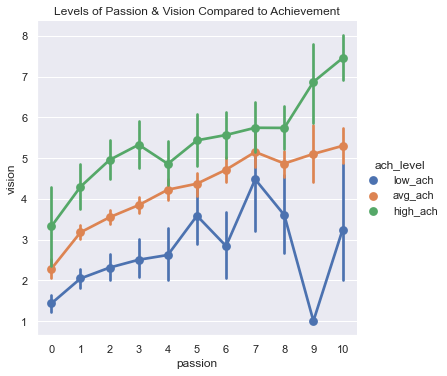

In [102]:
sns.factorplot(x = "passion", y = 'vision', hue = "ach_level",data = train)
plt.title('Levels of Passion & Vision Compared to Achievement')
plt.show()

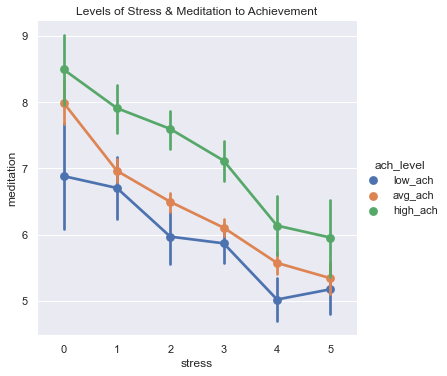

In [103]:
sns.factorplot(x = "stress", y = 'meditation', hue = "ach_level",data = train)
plt.title('Levels of Stress & Meditation to Achievement')
plt.show()




**In future iterations of this project I will:**
1. Model and test more tightly binned data to more specifically describe levels of each lifestyle factor that are likely to lead to higher levels of personal achievement. 
2. Look at additional questions, such as
   - how do different combinations of bmi, fruit/veggies, and steps impact achievement?
   - does high achievement = high stress / can less stress still = high achievement?
3. Pull much of the code in the explore and model steps in utility functions, to make the notebook more succinct.
4. Update data dictionary to describe binned data

# Data Dictionary

| Attribute | Definition | Data Type |
| ----- | ----- | ----- |
sleep |typical number of hours of sleep per night over the course of a typical week |float64|
|stress | 0 (not much stress) to 5 (a lot of stress) experienced at work or at home, due to the environment (noise, pollution, insecurity...), co-workers, or because of tragic events such as divorce, job loss, serious illness, loss of family or friends on average over 12 months.|int64|
|recognition| Range of 0-9, or 10 or more significant public recognitions validating a personal level of expertise and engagement (for example: diploma, degree, certificate, accreditation, award, prize, published book, presentation at major conference, medals, cups, titles.)|
|is_female|0 = male, 1 = female |int|
|fruit_veggies|Number of fruits or vegetables eaten daily (0-5)| int64 |
|places visited| How many new places repondants visited in last 12 months (Includes new states, new cities as well as museum, places of interest and parks in your neighborhood.)| int64 |
|core_circle| Number of people respondant has in close circle (0-10) | int64 |
|supporting others|Number of people you help achieve a better life (0-10) |int64 |
|social network |Number of people you interact with daily (0-10)| int64 | 
|bmi|Respondant's body mass in kg divided by the square of height in meters ( 0 = < 25, 1 = > 25 |float64|
|todo_completed| How often do you completed your weekly to do list |float64|
|flow|Hour per day that respondant experienced flow. 'Flow' is defined as the mental state, in which you are fully immersed in performing an activity. You then experience a feeling of energized focus, full involvement, and enjoyment in the process of this activity. ||
|daily_steps|How many steps (in thousands) do you walk in a typical day? (<1 to 10+)||
|life vision|For how many years ahead do you have a clear life vision (0 to 10+)||
|daily_shouting|In a typical week do you shout or sulk at another person or express negative emotions in an active or passive manner. (0 to 10+)||
|donation|Over a period of 12 months, how many times do you donate your time or money to good causes? ||
|sufficient income| Is income sufficient to cover basic life expenses 0 = no/barely 1 = sufficient ||
|time for passion|Daily hours spent doing what you are passionate and dreaming about||
|achievement|Number of remarkable achievements respondent is proud of. (0-10)||
|lost vacation|Hours of vacation NOT taken. ||
|weekly meditation| Number of times respondant meditates, prays or engages in relaxation activities such as walking in a park or lunch breaks each week (0-10)||
| age|Age is binned in years as: < 20, 21 to 35, 36 to 50, 51 or more||
|work_life_balance_score|||

